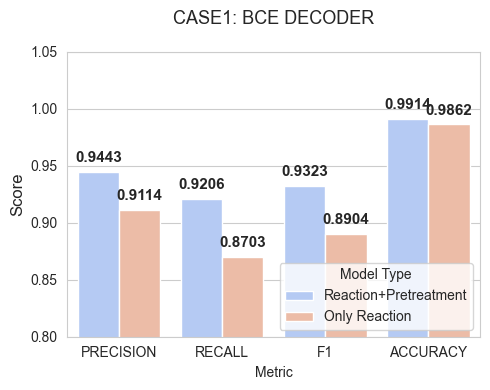

--- 분석 결과 ---
BCE Loss 개선: 0.0414 -> 0.0214 (48.27% 감소)


In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 각 JSON 파일에서 데이터 로드
with open('reaction_condition_metrics.json', 'r') as f:
    reaction_metrics = json.load(f)

with open('pre_re_condition_metrics.json', 'r') as f:
    pre_re_metrics = json.load(f)

# 2. 비교하고 싶은 주요 지표 리스트 (BCE, Precision, Recall, F1, Accuracy)
target_keys = ["bce", "precision", "recall", "f1", "accuracy"]

# 3. 시각화를 위한 데이터프레임 구조 생성
comparison_data = []

for key in target_keys:
    # Reaction 모델 데이터 추가
    comparison_data.append({
        "Metric": key.upper(),
        "Value": pre_re_metrics[key],
        "Model": "Reaction+Pretreatment"
    })
    # Pre-Re 모델 데이터 추가
    comparison_data.append({
        "Metric": key.upper(),
        "Value": reaction_metrics[key],
        "Model": "Only Reaction"
    })

df = pd.DataFrame(comparison_data)

# 4. 시각화 (Grouped Bar Chart)
plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")

# BCE는 값이 작으므로 다른 지표들과 스케일을 맞추기 위해 
# 0~1 사이의 일반 지표(Precision, Recall 등)만 먼저 그리는 것이 좋습니다.
df_main = df[df['Metric'] != 'BCE']
df_bce = df[df['Metric'] == 'BCE']

# 메인 지표 그래프
ax = sns.barplot(data=df_main, x="Metric", y="Value", hue="Model", palette="coolwarm")

# 수치 표시 (막대 위)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.title("CASE1: BCE DECODER", fontsize=13, pad=20)
plt.ylim(0.8, 1.05) # 차이를 명확히 하기 위해 y축 범위 조정
plt.ylabel("Score", fontsize=12)
plt.legend(title="Model Type", loc='lower right')

plt.tight_layout()
plt.savefig("json_comparison_result.png", dpi=300)
plt.show()

# 5. BCE 성능 개선 별도 출력
bce_r = reaction_metrics['bce']
bce_p = pre_re_metrics['bce']
improvement = ((bce_r - bce_p) / bce_r) * 100

print(f"--- 분석 결과 ---")
print(f"BCE Loss 개선: {bce_r:.4f} -> {bce_p:.4f} ({improvement:.2f}% 감소)")